normalization does not work well with outliers.

'before scaling'

,X1
count,1000.0000
mean,-0.0453
std,0.9875
min,-3.0461
25%,-0.6984
50%,-0.0580
75%,0.6070
max,2.7594


'before scaling'

,X1
0,3


X1   1.0872
dtype: float64

'normalization'

,X1
count,1000.0000
mean,0.5169
std,0.1701
min,0.0000
25%,0.4044
50%,0.5147
75%,0.6292
max,1.0000


normalization [[1.0414512]] X1   1.0415
dtype: float64


'standardization'

,X1
count,1000.0000
mean,-0.0000
std,1.0005
min,-3.0403
25%,-0.6617
50%,-0.0129
75%,0.6608
max,2.8415


standardization [[3.08526282]] X1   1.0858
dtype: float64


'robust'

,X1
count,1000.0000
mean,0.0098
std,0.7565
min,-2.2891
25%,-0.4906
50%,0.0000
75%,0.5094
max,2.1583


robust [[2.34265111]] X1   1.0854
dtype: float64


Text(0.5, 1.0, 'robust')

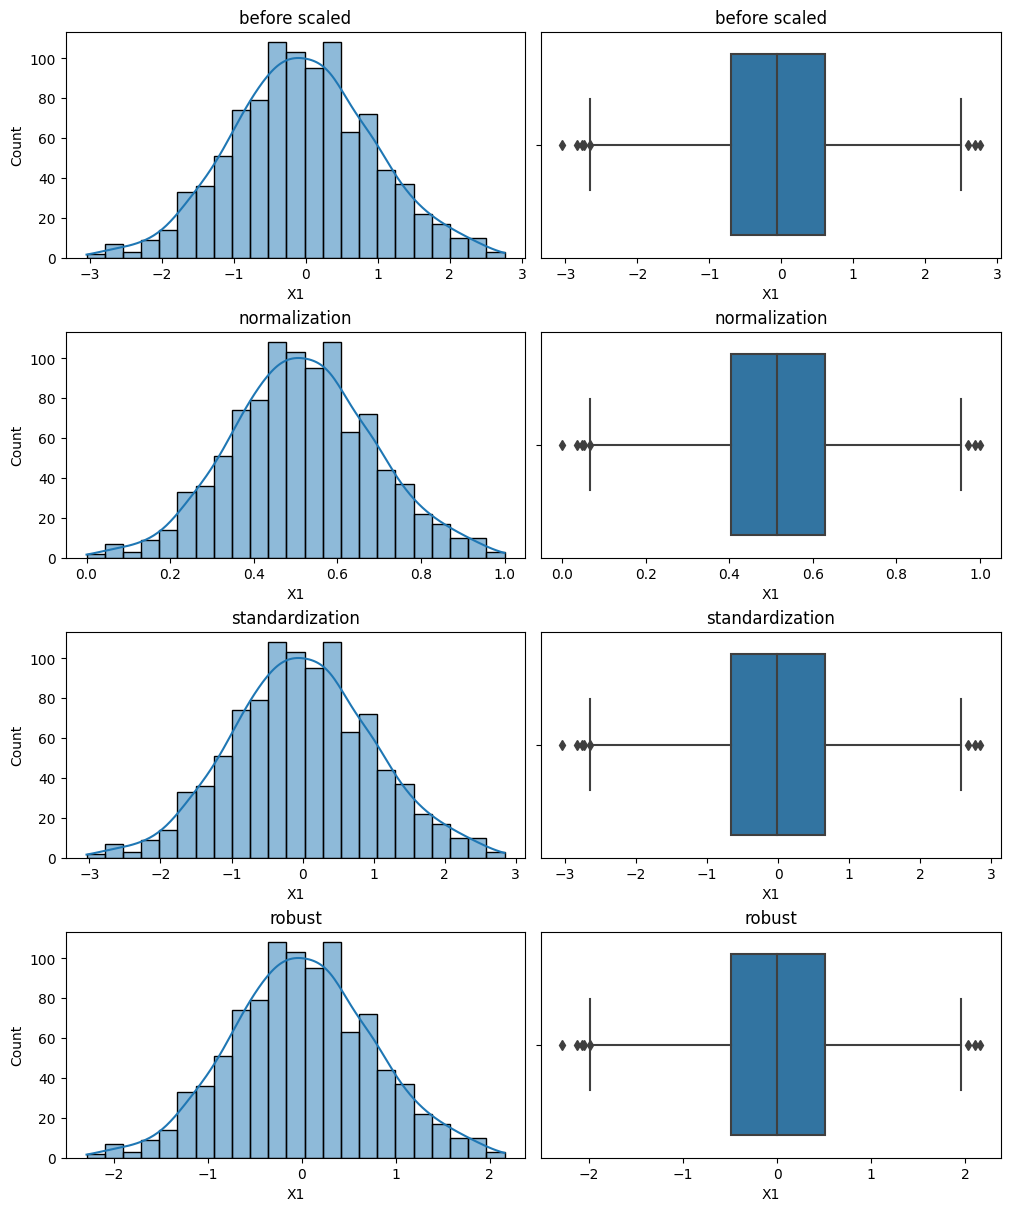

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
X_train = np.random.normal(0, 1, 1000).reshape(-1,1)

X_train = pd.DataFrame(data=X_train, columns=['X1'])

normalization = MinMaxScaler().fit(X=X_train)
standartization = StandardScaler().fit(X=X_train)
robust = RobustScaler().fit(X=X_train)

X_test = pd.DataFrame(data=[[3]], columns=['X1'])

pd.options.display.float_format = "{:.4f}".format

display("before scaling", X_train.describe())
display("before scaling", X_test, X_test['X1'][0]/X_train.max())

fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(10,12))
sns.histplot(data=X_train, x="X1", ax=axes[0][0], kde=True)
axes[0][0].set_title(label='before scaled')
sns.boxplot(data=X_train, x="X1", ax=axes[0][1])
axes[0][1].set_title(label='before scaled')

# outlier importances is the same.
X_train_normal = pd.DataFrame(data=normalization.transform(X_train), columns=['X1'])

display("normalization", X_train_normal.describe())
X_test_normal = normalization.transform(X_test)
print("normalization", X_test_normal, X_test_normal[0][0]/X_train_normal.max())

sns.histplot(data=X_train_normal, x="X1", ax=axes[1][0], kde=True)
axes[1][0].set_title(label='normalization')
sns.boxplot(data=X_train_normal, x="X1", ax=axes[1][1])
axes[1][1].set_title(label='normalization')

X_train_standard = pd.DataFrame(data=standartization.transform(X_train), columns=['X1'])

display("standardization", X_train_standard.describe())
X_test_standard = standartization.transform(X_test)
print("standardization", X_test_standard, X_test_standard[0][0]/X_train_standard.max())

sns.histplot(data=X_train_standard, x="X1", ax=axes[2][0], kde=True)
axes[2][0].set_title(label='standardization')
sns.boxplot(data=X_train_standard, x="X1", ax=axes[2][1])
axes[2][1].set_title(label='standardization')

X_train_robust = pd.DataFrame(data=robust.transform(X_train), columns=['X1'])

display("robust", X_train_robust.describe())
X_test_robust = robust.transform(X_test)
print("robust", X_test_robust, X_test_robust[0][0]/X_train_robust.max())

sns.histplot(data=X_train_robust, x="X1", ax=axes[3][0], kde=True)
axes[3][0].set_title(label='robust')
sns.boxplot(data=X_train_robust, x="X1", ax=axes[3][1])
axes[3][1].set_title(label='robust')


# OrdinalEncoder

In [80]:
from sklearn.preprocessing import OrdinalEncoder

X_train = [[-1],
           [-2],
           [0],
           [1],
           [2],
           [3],
           [4]]

ordinal = OrdinalEncoder(
    categories=[[-2,-1,0,1,2,3,4,5,6,7,8,9]],
    handle_unknown='use_encoded_value',
    unknown_value=np.nan
).fit(X=X_train)

print(ordinal.transform(X=[[10]]))
print(ordinal.inverse_transform(X=[[np.nan]]))

[[nan]]
[[None]]


# OneHotEncoder

do not combine drop='first' with handle_unknown='ignore'

it will result to unwanted interpretation.

In [39]:
from sklearn.preprocessing import OneHotEncoder

X_train = [['A'],
           ['B'],
           ['C']]

onehot = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train)

print(onehot.transform(X=[['D']]).toarray())
print(onehot.inverse_transform(X=[[0.,0.]]))

[[0. 0.]]
[['A']]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [70]:
X = np.array([[-2] * 10 + [-1] * 10 + [0] * 15 + [1] * 10 + [2] * 10 + [3] * 1], dtype=int).T
ohe = OneHotEncoder(drop='first', sparse=False, 
                    max_categories=6, handle_unknown="infrequent_if_exist",
                    min_frequency=0.011).fit(X)
# print(ohe.infrequent_categories_)
print(repr(ohe.transform([[-2], 
                          [-1],
                          [0],
                          [1],
                          [2],
                          [3],
                          [4],
                          [5],
                          [6],
                          [7],
                          [8],
                          [9]])))
print(ohe.inverse_transform([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]]))

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])
[[-2]
 [-1]
 [0]
 [1]
 [2]
 ['infrequent_sklearn']
 ['infrequent_sklearn']
 ['infrequent_sklearn']
 ['infrequent_sklearn']
 ['infrequent_sklearn']
 ['infrequent_sklearn']
 ['infrequent_sklearn']]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [72]:
X = np.array([[-2] * 10 + [-1] * 10 + [0] * 15 + [1] * 10 + [2] * 10 + [3] * 1], dtype=int).T
ohe = OneHotEncoder(drop='first', sparse=False, 
                    categories=[[-2,-1,0,1,2]],
                    handle_unknown='ignore').fit(X)
# print(ohe.infrequent_categories_)
print(repr(ohe.transform([[-2], 
                          [-1],
                          [0],
                          [1],
                          [2],
                          [3],
                          [4],
                          [5],
                          [6],
                          [7],
                          [8],
                          [9]])))
print(ohe.inverse_transform([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]))

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
[[-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [-2]
 [-2]
 [-2]
 [-2]
 [-2]
 [-2]
 [-2]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Metrics

F1 weighted score
```
F1 Score = 2 * Precision * Recall / ( Precision + Recall )

F1 Micro Score = Accuracy.

F1 Macro Score = Σ ( F1 Score ) / length

F1 Weighted Score = Σ ( F1 Score * Support Proportion )

Recall = TP / TP + FN
Precision = TP / TP + FP
```

Balanced accuracy
```
Balanced accuracy = (Sensitive + Specificity) / 2

Sensitive (true positive rate) = TP / TP + FN

Specificity (true negative rate) = TN / TN + FP
```